In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths

storage = paths.storage.Storage("toy_retis.nc", "r")

In [2]:
len(storage.samplesets)

893

In [3]:
retis = storage.transitions.load(0)

In [4]:
%%time
storage.samples.cache_all()

CPU times: user 297 ms, sys: 37.3 ms, total: 335 ms
Wall time: 826 ms


### Defining labels

Everything is actually done in terms of ensembles. We can map the ensembles to any labels. In our case, we use the initial replica ID associated with the ensemble. We use this as both the numeric and string label.

In [5]:
sset0 = storage.samplesets[0]
numeric_labels = { s.ensemble : s.replica for s in sset0}
string_label = { s.ensemble : str(s.replica) for s in sset0 }

## Trace of ensemble visited by a replica

In the plot below, you'll see we set the labels on the axis as sset0[e].replica, so we use the replica ID associated with the ensemble in the first timestep.

In [6]:
%%time
trace_1 = paths.trace_ensembles_for_replica(0, storage)

CPU times: user 14.8 s, sys: 96.8 ms, total: 14.9 s
Wall time: 15.6 s


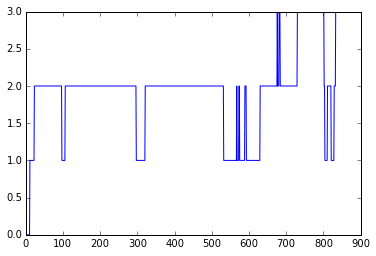

In [7]:
plt.plot([sset0[e].replica for e in trace_1])

### Replica flow

In [8]:
repx_net = paths.ReplicaNetwork(storage=storage)

In [9]:
repx_net.flow(bottom=retis.minus_ensemble, top=retis.ensembles[-1])

{<openpathsampling.ensemble.MinusInterfaceEnsemble at 0x10b2d26d0>: 1.0,
 <openpathsampling.ensemble.TISEnsemble at 0x10b2cc1d0>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x10b2cc2d0>: 0.9411764705882353,
 <openpathsampling.ensemble.TISEnsemble at 0x10b2cc810>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x10b2d2310>: 0.9511111111111111,
 <openpathsampling.ensemble.TISEnsemble at 0x10b2d2c50>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x10b2e1ed0>: 0.987546699875467}

### Trips

Now we calculate "up" trips, "down" trips, and round-trips.

In [10]:
repx_net.trips(bottom=retis.minus_ensemble, top=retis.ensembles[-1])

{'down': [], 'round': [], 'up': []}

### Transition matrix

The 

In [11]:
repx_net.transition_matrix()

,-1,0,1,2,3,4,5
-1,0,0.00,0.000000,0.000000,0.000000,0.000,0
0,1,0.00,0.000000,0.000000,0.000000,0.000,0
1,0,0.25,0.000000,0.000000,0.000000,0.000,0
2,0,0.00,0.589744,0.000000,0.000000,0.000,0
3,0,0.00,0.000000,0.176471,0.000000,0.000,0
4,0,0.00,0.000000,0.000000,0.128205,0.000,0
5,0,0.00,0.000000,0.000000,0.000000,0.375,0


### Mixing matrix

In [12]:
repx_net.mixing_matrix()

,-1,0,1,2,3,4,5
-1,0.0,0.500,0.000000,0.000000,0.000000,0.000000,0.0000
0,0.5,0.000,0.125000,0.000000,0.000000,0.000000,0.0000
1,0.0,0.125,0.000000,0.294872,0.000000,0.000000,0.0000
2,0.0,0.000,0.294872,0.000000,0.088235,0.000000,0.0000
3,0.0,0.000,0.000000,0.088235,0.000000,0.064103,0.0000
4,0.0,0.000,0.000000,0.000000,0.064103,0.000000,0.1875
5,0.0,0.000,0.000000,0.000000,0.000000,0.187500,0.0000


### Making a pretty picture

In [13]:
repxG = paths.ReplicaNetworkGraph(repx_net)

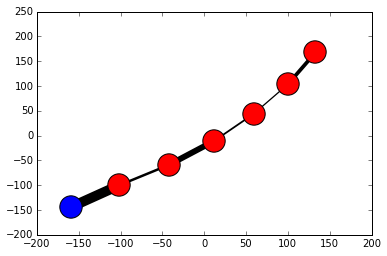

In [14]:
repxG.draw()